🌟 Good morning everyone!

I hope all of you are doing great and feeling energized today 😊

🎯 Today’s session is going to be exciting because we’ll be doing a hands-on practice with Artificial Neural Networks (ANN) and also take a quick recap of what we learned earlier 🤖🧠

💡 So get ready, stay curious, and let’s make this session interactive, fun, and productive 🚀✨

The Fashion MNIST dataset was created by Zalando Research (a European fashion company).
It’s a standard benchmark dataset — just like MNIST digits — and its documentation defines the label meanings.



The original source:
📘 Zalando Research – Fashion-MNIST Dataset
👉 https://github.com/zalandoresearch/fashion-mnist

DATA DESCRIPTION


| Label | Class Name      | Description          |
| :---: | :-------------- | :------------------- |
|   0   | **T-shirt/top** | Short-sleeved top    |
|   1   | **Trouser**     | Pants                |
|   2   | **Pullover**    | Long-sleeved sweater |
|   3   | **Dress**       | One-piece dress      |
|   4   | **Coat**        | Overcoat or jacket   |
|   5   | **Sandal**      | Open shoe            |
|   6   | **Shirt**       | Button-down shirt    |
|   7   | **Sneaker**     | Sports shoe          |
|   8   | **Bag**         | Handbag or tote      |
|   9   | **Ankle boot**  | Boot or shoe         |


In [ ]:
#step-1 importing
from tensorflow.keras.datasets import fashion_mnist
import matplotlib.pyplot as plt

In [ ]:
#step-2 loding the data

(x_train,y_train),(x_test,y_test) = fashion_mnist.load_data()

print(x_train.shape)
print(x_test.shape)

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
(60000, 28, 28)
(10000, 28, 28)


In [ ]:
60000/70000

0.8571428571428571

In [ ]:
10000/70000

0.14285714285714285

In [ ]:
#to show the data
print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 23

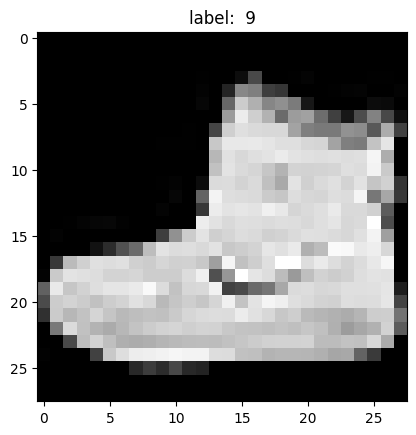

In [ ]:
#vis the image

plt.imshow(x_train[0], cmap = 'gray')
plt.title(f"label:  {y_train[0]}")
plt.show()

In [ ]:
#normalization
x_train = x_train/255
x_test = x_test/255

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten

In [ ]:
model = Sequential([
    Flatten(input_shape = (28,28)),
    Dense(128, activation = 'relu'),
    Dense(64, activation = 'relu'),
    Dense(10,activation= 'softmax')
])
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#compiling

model.compile(optimizer = 'adam',loss = 'sparse_categorical_crossentropy',
              metrics =['accuracy'])

In [ ]:
#training

history = model.fit(x_train,y_train,epochs = 10,validation_data= (x_test,y_test))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.7827 - loss: 0.6303 - val_accuracy: 0.8471 - val_loss: 0.4357
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8624 - loss: 0.3790 - val_accuracy: 0.8576 - val_loss: 0.3855
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8763 - loss: 0.3358 - val_accuracy: 0.8658 - val_loss: 0.3751
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8861 - loss: 0.3085 - val_accuracy: 0.8659 - val_loss: 0.3756
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8918 - loss: 0.2938 - val_accuracy: 0.8775 - val_loss: 0.3417
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8979 - loss: 0.2762 - val_accuracy: 0.8714 - val_loss: 0.3579
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9009 - loss: 0.2655 - val_accuracy: 0.8723 - val_loss: 0.3411
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9023 - loss: 0.2551 -

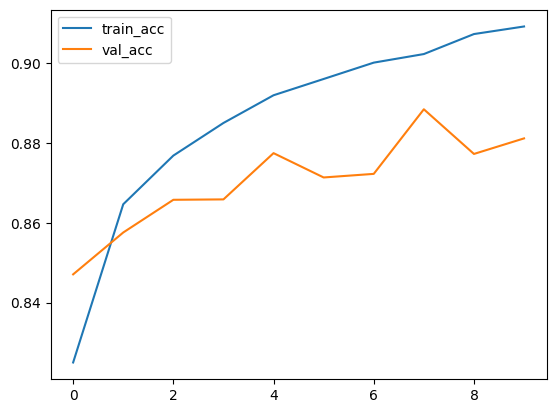

In [ ]:
plt.plot(history.history['accuracy'], label = 'train_acc')
plt.plot(history.history['val_accuracy'],label = "val_acc")
plt.legend()
plt.show()

In [ ]:
loss,acc = model.evaluate(x_test,y_test)
print(acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8802 - loss: 0.3412
0.8812000155448914


In [ ]:
import numpy as np
pred = model.predict(x_test)

index = 0


plt.imshow(x_test[index], cmap = 'gray')
plt.title(f"Actual : {y_test[index]} | predicted : {np.argmax}")

In [ ]:
a = [2,5,50,1]
print